In [36]:
check_dir = "/mnt/merfish9/20230919_R128_N5S1MER/RMERFISH_analysis/"

import glob, os
from collections import defaultdict
fovs = defaultdict(list)
for filename in glob.glob(check_dir + os.sep + "*_Xhfits.npz"):
    fov = filename.split("--")[0].split("__")[1]
    fovs[fov].append(filename)

In [37]:
from collections import Counter
Counter([len(x) for x in fovs.values()])

Counter({12: 762})

In [18]:
import numpy as np
from ioMicro import read_im
spots = np.load("/mnt/merfish9/20230919_R128_N5S1MER/RMERFISH_analysis/Conv_zscan__000--H1_RMER_1--col0__Xhfits.npz")["Xh"]
img = read_im("/mnt/merfish9/20230919_R128_N5S1MER/RMERFISH/H1_RMER_1/Conv_zscan__000.zarr")[0]

In [28]:
spots = spots[spots[:,-4] > 0.5]
spots = spots[spots[:,-1] > 5000]

(1000.0, 1200.0)

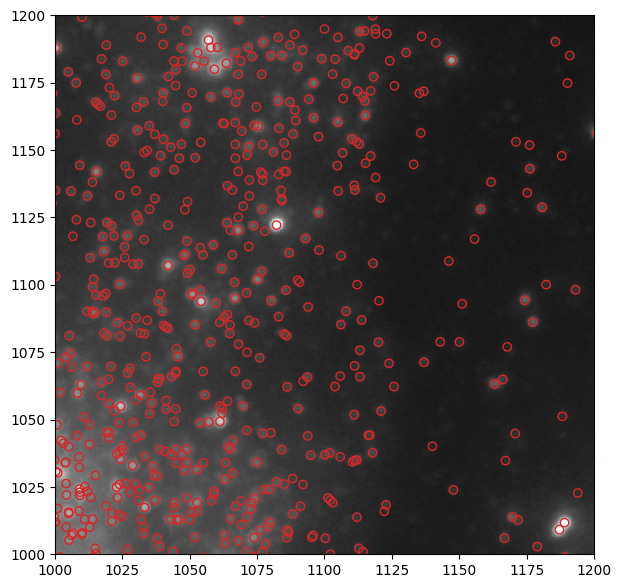

In [29]:
import matplotlib.pyplot as plt

maxim = img.max(axis=0)
plt.figure(figsize=(7,7))
plt.imshow(maxim, cmap="gray", vmax=np.percentile(np.array(maxim), 99.9))
plt.scatter(spots[:,2], spots[:,1], facecolors="none", edgecolors="tab:red")
plt.xlim(1000,1200)
plt.ylim(1000,1200)